# **Importing dependencies**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Image Processing

**Convert images to numpy arrays**

Done in traing in Extracting train notebook

Exporting the process image of numpyarray in data from extracting-train notebook

In [2]:
# Load the data
loaded_data = np.load('/kaggle/input/extracting-train/training_data.npz')

# Access the NumPy array
data = loaded_data['data']

# **Analyzing the train set**

In [3]:
image_count = data.shape[0]
print('Number of images: ', image_count)

Number of images:  50000


**Displaying the images**

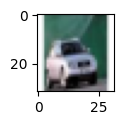

In [4]:
#display an image
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

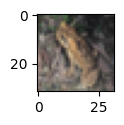

In [5]:
#display an image
img = data[10012]
plt.figure(figsize=(2,1))
plt.imshow(img)

# **Labels Processing**

In [6]:
labels_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [7]:
labels_df.shape

(50000, 2)

In [8]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [9]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [10]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [11]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


Labels are marked serially by id and evenly distributed ( below )

In [12]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [13]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [14]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [15]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [16]:
len(labels)

50000

Checking labels correctness:

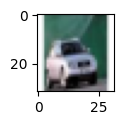

In [17]:
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

In [18]:
labels_df[labels_df['id'] == 9999]

,id,label
9998,9999,automobile


In [19]:
labels[9998] # automobile = 1 , and 0 base indexing in List

1

In [20]:
id_list = list(labels_df['id'])

In [21]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# Data -> x , Labels -> y

In [22]:
type(data)

numpy.ndarray

In [23]:
len(data)

50000

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(32, 32, 3)

In [26]:
# convert image list and label list to numpy arrays

x = data
y = np.array(labels)

In [27]:
type(x)

numpy.ndarray

In [28]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [29]:
# #small data for testing while naking the model
# x = x[:10000]
# y = y[:10000]

In [30]:
x[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Defining the neural network using Resnet50

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

Resnet: https://keras.io/api/applications/resnet/

In [33]:
def createModel():
    
    num_of_classes = 10
    
    convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
    
    model = models.Sequential() 
    
    model.add(layers.UpSampling2D((2,2))) # 32 * 2 = 64
    model.add(layers.UpSampling2D((2,2))) # 64 * 2 = 128
    model.add(layers.UpSampling2D((2,2))) # 128 * 2 = 256

    model.add(convolutional_base)

    model.add(layers.Flatten())  # transforms the input into a one-dimensional array (flattens it) without modifying the actual data. 

    model.add(layers.BatchNormalization()) #normalization
    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dropout(0.5)) #droping or making somen neuron inactive to avoid overfitting

    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))
    
    return model


# Training on different different training split

In [34]:
# Define data percentages
data_percentages = [0.1, 0.2, 0.3, 0.4, 0.5]


histories = []
accuracies = []
losses = []
f1_scores = []
conf_mats = []

In [35]:
from sklearn.metrics import f1_score
from tensorflow.math import confusion_matrix

In [36]:
# Loop over data percentages
for data_percentage in data_percentages:
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=data_percentage, random_state=2)
    
    # scaling data
    x_train_scaled = x_train/255
    x_test_scaled = x_test/255
    
    # Building the model and compiling it
    model = createModel()
    model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs= 10, batch_size=100)
    
    # making prediction on test data
    y_pred = model.predict(x_test_scaled)
    y_pred_labels = y_pred.argmax(1)
    
    # Evaluate the model on the test set
    
    split_f1_score = f1_score(y_test, y_pred_labels, average="macro")
    loss, accuracy  = model.evaluate(x_test_scaled, y_test)
    conf_mat = confusion_matrix(y_test, y_pred_labels)

    histories.append(history)
    accuracies.append(accuracy)
    losses.append(loss)
    f1_scores.append(split_f1_score)
    conf_mats.append(conf_mat)

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/10
45/45 [==============================] - 67s 614ms/step - loss: 1.6457 - accuracy: 0.4782 - val_loss: 7.1075 - val_accuracy: 0.0980
Epoch 2/10
45/45 [==============================] - 26s 588ms/step - loss: 0.9007 - accuracy: 0.7024 - val_loss: 2.4586 - val_accuracy: 0.0940
Epoch 3/10
45/45 [==============================] - 26s 589ms/step - loss: 0.5692 - accuracy: 0.8140 - val_loss: 2.6050 - val_accuracy: 0.1040
Epoch 4/10
45/45 [==============================] - 26s 588ms/step - loss: 0.2946 - accuracy: 0.9164 - val_loss: 2.4798 - val_accuracy: 0.0940
Epoch 5/10
45/45 [==============================] - 26s 588ms/step - loss: 0.1624 - accuracy: 0.9611 - val_loss: 2.4660 - val_accuracy: 0.0980
Epoch 6/10
45/45 [==============================] - 26s 588ms/step - loss: 0.0991 - accuracy: 0.9773 - val_loss: 2.5735 - val_accuracy: 0.0980
Epoch 7/10
45/45 [==============================] - 26s 588ms/step - loss: 0.

# Printing the evaluation

In [37]:
from tabulate import tabulate
import seaborn as sns

In [38]:
table_data = []
for i, data_percentage in enumerate(data_percentages):
    table_data.append([f"{data_percentage * 100:.0f}%", accuracies[i], losses[i], f1_scores[i]])

headers = ["Train Data", "Accuracy", "Loss", "F1-Score"]
table = tabulate(table_data, headers=headers, tablefmt="pretty")

print(table)

+------------+---------------------+--------------------+----------------------+
| Train Data |      Accuracy       |        Loss        |       F1-Score       |
+------------+---------------------+--------------------+----------------------+
|    10%     | 0.10042222589254379 | 3.457371950149536  | 0.018500250706940856 |
|    20%     | 0.5664250254631042  | 1.677269697189331  |  0.5698971114490277  |
|    30%     | 0.8105714321136475  | 0.6641058325767517 |  0.8107338343780148  |
|    40%     | 0.7808333039283752  | 0.9963027238845825 |  0.7773291985829132  |
|    50%     |  0.826200008392334  | 0.7902830243110657 |  0.8243640205780398  |
+------------+---------------------+--------------------+----------------------+


**Printing the confusion matrix**

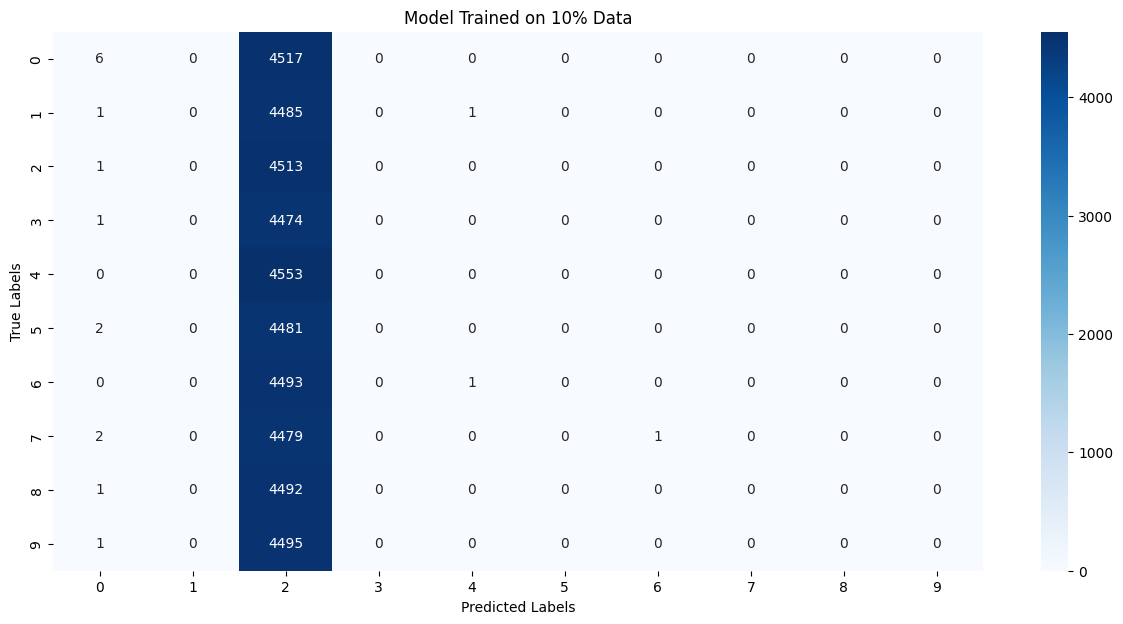

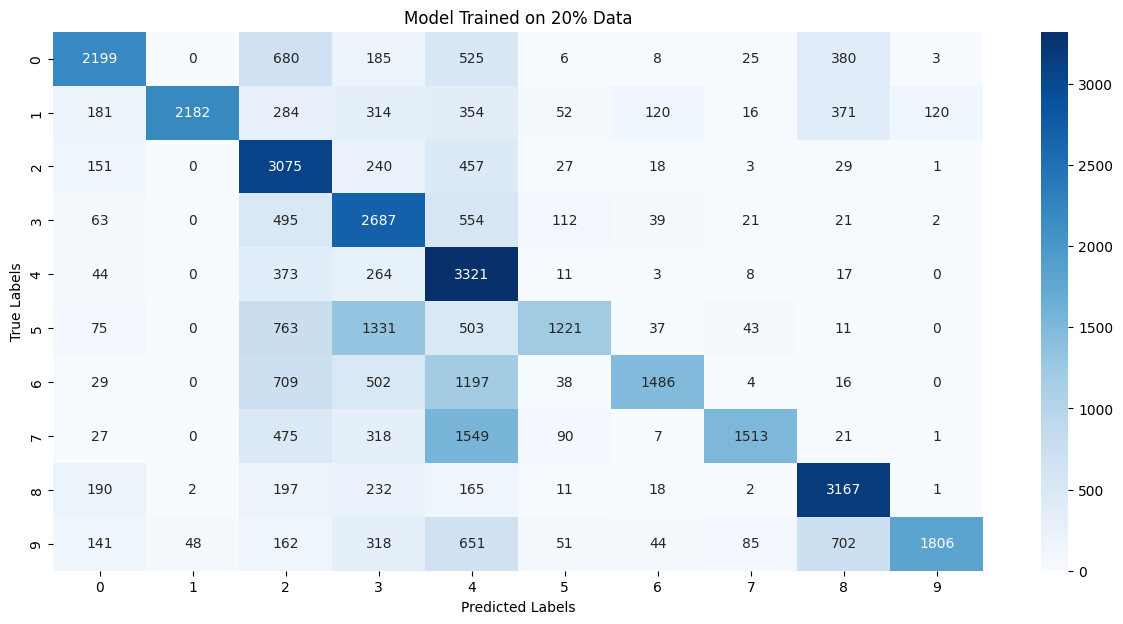

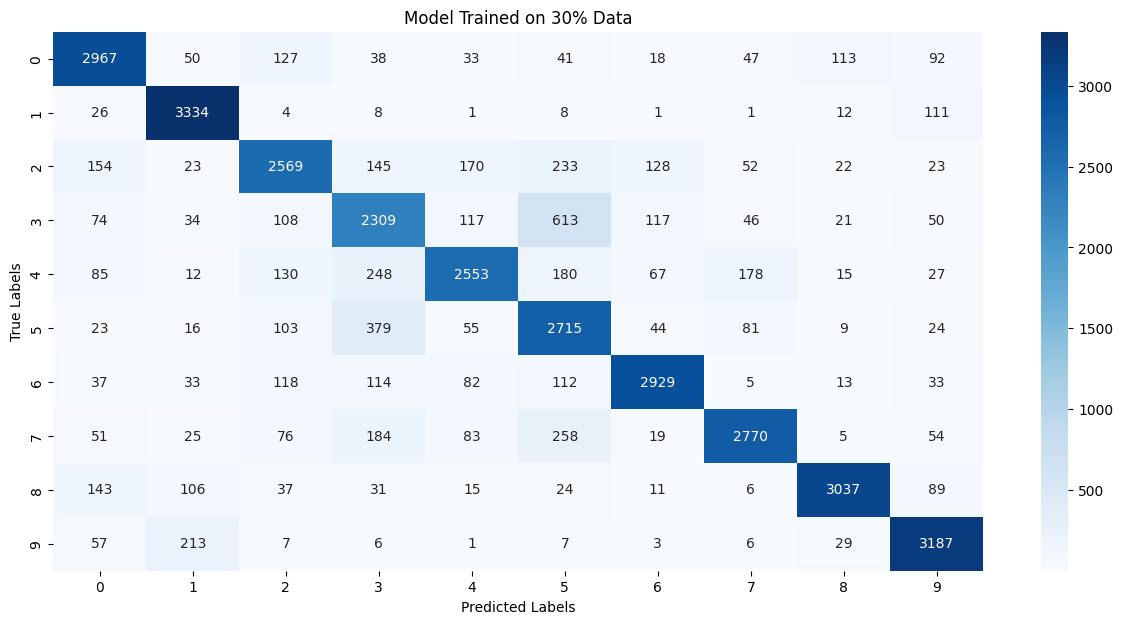

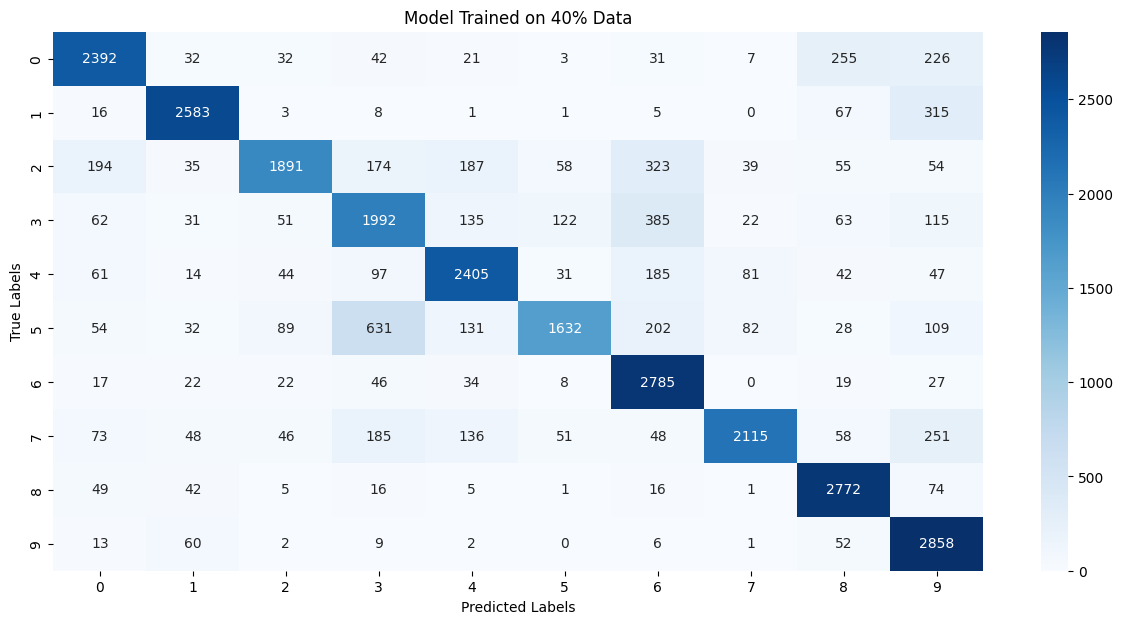

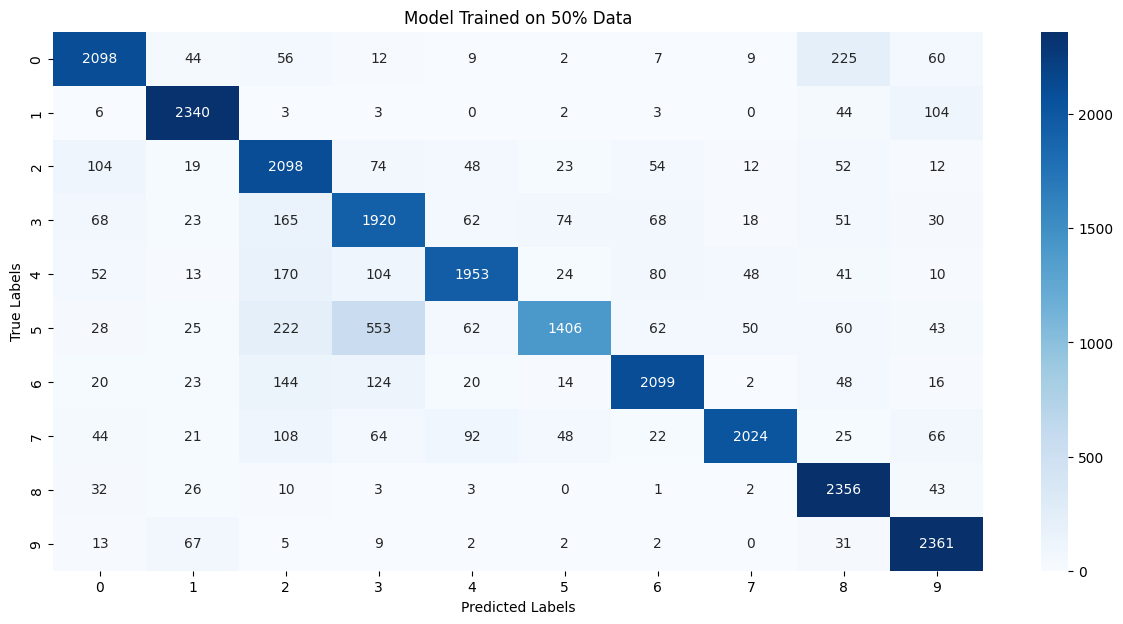

In [39]:
for i, data_percentage in enumerate(data_percentages):
    plt.figure(figsize=(15, 7))
    sns.heatmap(conf_mats[i], annot=True, fmt='d', cmap='Blues')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title(f'Model Trained on {data_percentage * 100:.0f}% Data')
    plt.show()